In [86]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
#mpld3.enable_notebook()
import mpld3
import matplotlib.pyplot as plt
# Set up useful plot dimensions and scroll enable #
plt.rcParams["figure.figsize"] = [12, 7]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Parse through the file, and create a pandas DataFrame database style table to hold all event information

In [152]:
from src import transform 
from src import read_log_file as readlog
filename = "datasets/s_short"
filename = "datasets/g1_long"
database_table = readlog.get_parsed_data_from_file(filename)

### Seperate the stop the world and concurrent events for analysis

In [153]:
stw_table, concurrent_table = transform.seperatePausesConcurrent(database_table)


### For each event name, create a list of all corresponding data tables

In [154]:
stw_seperated_tables = transform.seperate_by_event_name(stw_table)
concurrent_seperated_tables = transform.seperate_by_event_name(concurrent_table)

### Plot the concurrent and stop the world periods


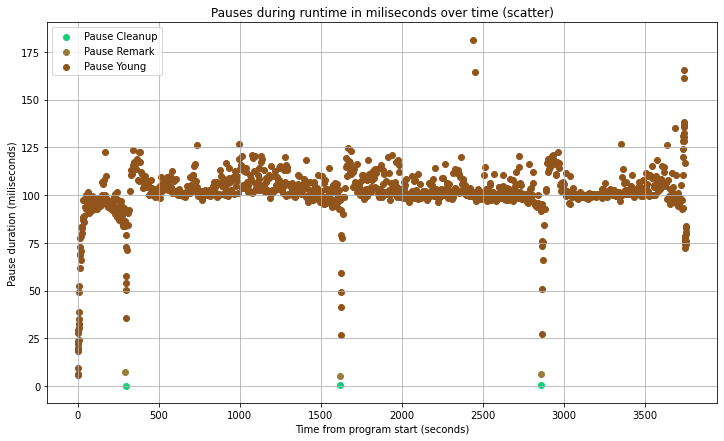

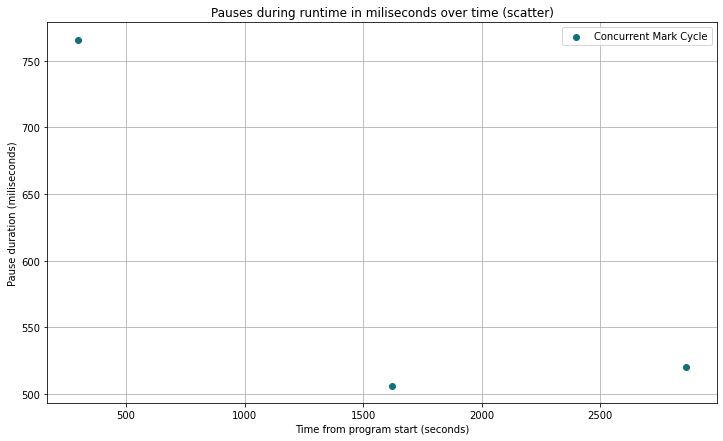

In [155]:
from src import graphing as graph
# Stop the world pauses
stw_time_lists, stw_duration_lists = transform.get_times_and_durations_from_event_lists(stw_seperated_tables)
labels = transform.get_event_table_labels(stw_seperated_tables)
plot = graph.comparrison_scatter(stw_time_lists, stw_duration_lists, None, None, labels)

# Concurrent periods
c_time_lists, c_duration_lists = transform.get_times_and_durations_from_event_lists(concurrent_seperated_tables)
labels = transform.get_event_table_labels(concurrent_seperated_tables)
plot = graph.comparrison_scatter(c_time_lists, c_duration_lists, None, None, labels)

### Time spent in Concurrent Phases vs. Stop The World phases

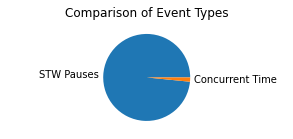

In [156]:
plt.rcParams["figure.figsize"] = [5, 2]
_ = graph.compare_eventtypes_pie(database_table)
plt.rcParams["figure.figsize"] = [12, 7]
# _ = graph.compare_eventtypes_bar(database_table)
# print("\n\nje\n\n")

### Print trends about the events based on Event Type and Name

In [157]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]

print("\t\t =========== Concurrent Vs Pauses Table ===========\n")
stw_times,stw_durations    = transform.get_time_and_event_durations(stw_table)
concurrent_times, concurrent_durations = transform.get_time_and_event_durations(concurrent_table)
graph.compare_trends([stw_durations, concurrent_durations], labels = labels, lists_of_timestamps = [stw_times, concurrent_times])
print("\n\n\n")


# Concurrent pauses comparison
print("\t\t\t=========== Concurrent Table ===========\n")
labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
graph.compare_trends(c_duration_lists, labels = labels)


print("\n\n\n")

# Stop the world pauses comparison
labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
print("\t\t\t=========== Pauses Table ===========\n")
graph.compare_trends(stw_duration_lists, labels = labels)



		 =========== Concurrent Vs Pauses Table ===========

 Trends (ms)      |  Event Count|  Max pause  |  Sum pauses |  Mean pauses|  Std Dev.   | Throughput   |
--------------------------------------------------------------------------------------------------------
Pauses            | 1116        | 181.425     | 111812.308  | 100.1902    | 16.4519     | 97.03%      | 
Concurrent        | 3           | 765.915     | 1792.247    | 597.4157    | 119.2751    | 99.94%      | 




			=========== Concurrent Table ===========

 Trends (ms)      |  Event Count|  Max pause  |  Sum pauses |  Mean pauses|  Std Dev.   |
-----------------------------------------------------------------------------------------
Mark Cycle        | 3           | 765.915     | 1792.247    | 597.4157    | 119.2751    | 




			=========== Pauses Table ===========

 Trends (ms)      |  Event Count|  Max pause  |  Sum pauses |  Mean pauses|  Std Dev.   |
----------------------------------------------------------------------

### Compare percentiles for pauses/concurrent phases, general and specific


In [158]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]

print("\t\t\t=========== Concurrent Vs Pauses ===========\n")
graph.compare_pauses_percentiles([stw_durations, concurrent_durations], labels = labels)
print("\n\n\n")


# Concurrent pauses comparison
print("\t\t\t=========== Concurrent Percentiles ===========\n")
labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
graph.compare_pauses_percentiles(c_duration_lists, labels = labels)


print("\n\n\n")

# Stop the world pauses comparison
labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
print("\t\t\t=========== Pauses Percentiles ===========\n")
graph.compare_pauses_percentiles(stw_duration_lists, labels = labels)




			=========== Concurrent Vs Pauses ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
Pauses     | 101.041 m | 106.101 m | 112.983 m | 117.244 m | 130.231 m | 165.385 m | 179.647 m | 
Concurrent | 519.933 m | 642.924 m | 716.719 m | 741.317 m | 760.995 m | 765.423 m | 765.866 m | 




			=========== Concurrent Percentiles ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
Mark Cycle | 519.933 m | 642.924 m | 716.719 m | 741.317 m | 760.995 m | 765.423 m | 765.866 m | 




			=========== Pauses Percentiles ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
---------------------------------------------------------------

### Average time in seconds per phase  / grouping

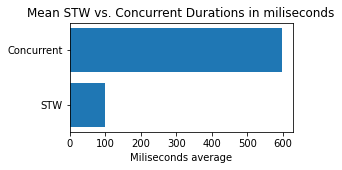

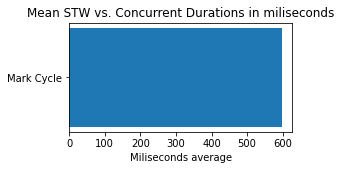

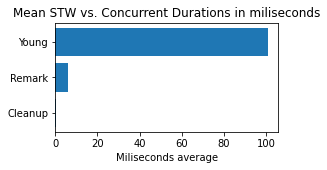

In [159]:
import numpy as np
plt.rcParams["figure.figsize"] = [4, 2]
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["STW", "Concurrent"]
fig, ax = plt.subplots()
y, y1 = stw_durations, concurrent_durations # i know , this is not good code. I will fix this when I turn this into an API Call.
pause_avg = round(sum(y)/len(y), 4)
concurrent_avg = round(sum(y1)/len(y1), 4)
ax.barh(np.arange(len(labels)), [pause_avg, concurrent_avg], align = 'center')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Miliseconds average')
ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')
########

labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
fig, ax = plt.subplots()
c_duration_averages = []
for i in range(len(c_duration_lists)):
    c_duration_averages.append(sum(c_duration_lists[i]) / len(c_duration_lists[i]))
ax.barh(np.arange(len(c_duration_averages)), c_duration_averages, align = 'center')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Miliseconds average')
ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')


fig, ax = plt.subplots()
labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
stw_duration_averages = []
for i in range(len(stw_duration_lists)):
    stw_duration_averages.append(sum(stw_duration_lists[i]) / len(stw_duration_lists[i]))
ax.barh(np.arange(len(labels)), stw_duration_averages, align = 'center')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Miliseconds average')
ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')

plt.rcParams["figure.figsize"] = [12, 7]


e of specified time range: 2804.93 > 550


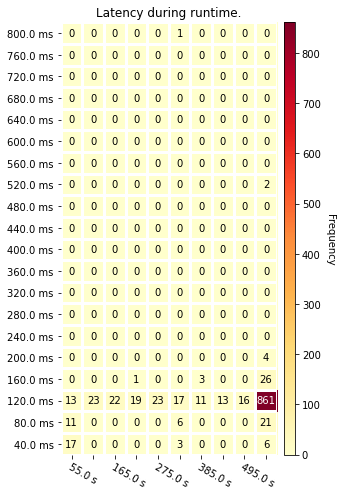

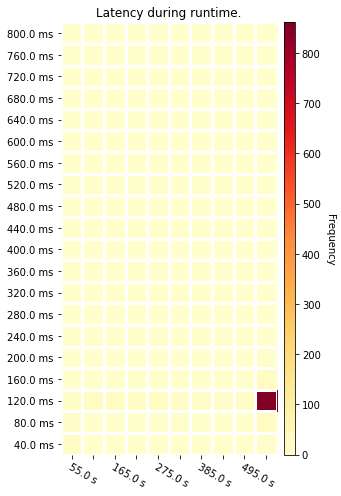

In [160]:
# Show latency heatmap
heatmap, dimensions = transform.get_heatmap_data(database_table, 10, 20, 55, 40)
graph.plot_heatmap(heatmap, dimensions, True)
graph.plot_heatmap(heatmap, dimensions, False)

In [161]:
### Plotting bar lines to display latency: Thicker and taller means longer duration pause.

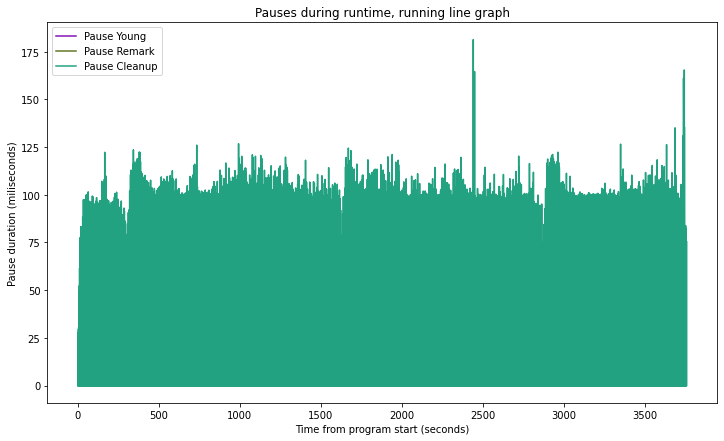

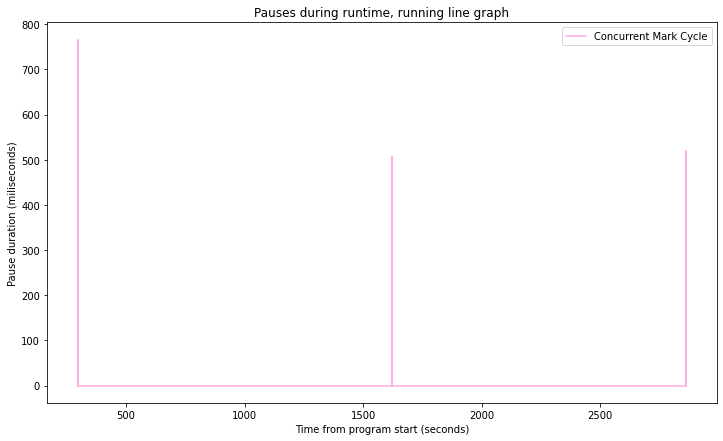

In [162]:
# Pauses during runtime
from src import graphing as graph

# Stop the world pauses
labels = transform.get_event_table_labels(stw_seperated_tables)
labels.reverse() 
graph.compare_paused_running_line(stw_time_lists, stw_duration_lists, None, None, labels, False)

# Concurrent periods
labels = transform.get_event_table_labels(concurrent_seperated_tables)
plot = graph.compare_paused_running_line(c_time_lists, c_duration_lists, None, None, labels)

In [163]:
### Allocation over time

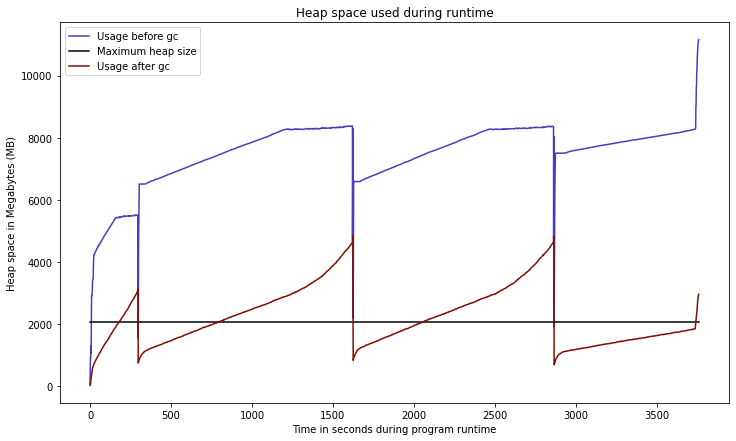

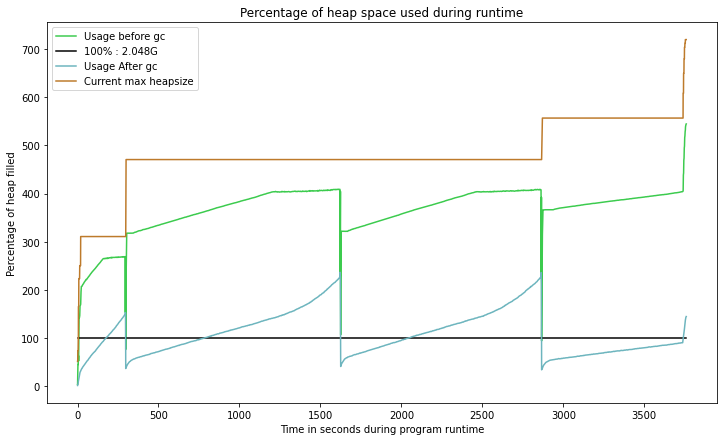

In [164]:
from src import graphing as graph
# Access the memory changed information 
before_gc, after_gc, max_heap, times_selected = transform.get_heap_occupancy(database_table)
max_heapsize = 2.048
heapsize_unit = "G"
g = graph.plot_heap_occupancy(times_selected, before_gc, "M", max_heapsize, heapsize_unit, label = "Usage before gc")
_ = graph.plot_heap_occupancy(times_selected, after_gc, "M", max_heapsize, heapsize_unit, axs = g, label = "Usage after gc", plot_max=False)
# Create a second graph using percentages
g = graph.plot_heap_occupancy_percentage(times_selected, before_gc, "M", max_heapsize, heapsize_unit, label = "Usage before gc")
g = graph.plot_heap_occupancy_percentage(times_selected, after_gc, "M", max_heapsize, heapsize_unit, label = "Usage After gc", axs = g, plot_max = False)
g = graph.plot_heap_occupancy_percentage(times_selected, max_heap, "M", max_heapsize, heapsize_unit, label = "Current max heapsize", axs = g, plot_max = False)
#allo = upl.getHeapAllocation(path1)

In [165]:
### Reclaimed bytes

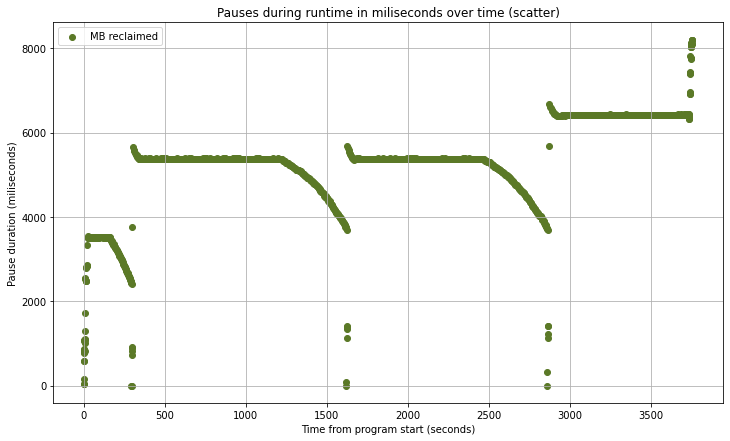

In [166]:
reclaimed, time_seconds = transform.get_reclaimed_mb_over_time(database_table)
f, axs = plt.subplots()
graph.plot_pauses_scatter(time_seconds, reclaimed, axs=axs, label = "MB reclaimed")

In [ ]:
### Frequencies of STW pauses (X ms buckets)

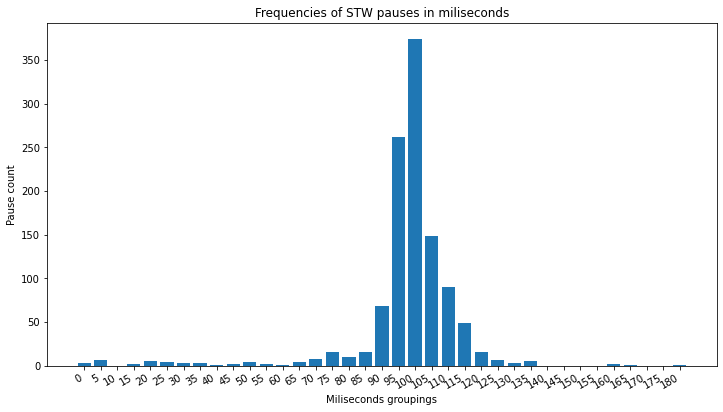

In [173]:
### Frequencies of STW pauses (X ms buckets)
bucket_size_ms = 5
o = transform.group_into_pause_buckets(stw_table, bucket_size_ms)
#######
fig, ax = plt.subplots()
labels = [str(i * bucket_size_ms)  for i in range(len(o))]
ax.bar(labels, height = o, align = 'center')
ax.set_xlabel('Miliseconds groupings')
ax.set_ylabel("Pause count")
_ = ax.set_title('Frequencies of STW pauses in miliseconds')
fig.autofmt_xdate()
